# **Fashion MNIST**

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
#import the train and test datasets using read_csv

train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
#list the labels of clothes 

labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
#split the target variable from predictor variables

x_train, y_train = train.iloc[:,1:],train.iloc[:,0:1]
x_test,y_test = test.iloc[:,1:],test.iloc[:,0:1]

In [5]:
#print the distribution of each class out of the whole dataset

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train)

Ankle Boot          :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Coat                :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Trouser             :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%


In [11]:
#Check for missing values

x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

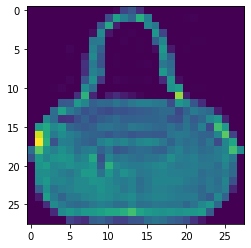

In [39]:
#Print a class using imshow 

example = 20
g = plt.imshow(x_train.values.reshape(-1,28,28,1)[example][:,:,0])

In [40]:
#scaling the variables to a smaller range
x_train = x_train / 255.
x_test = x_test / 255.

# Data Mining

In [41]:
#CatBoost Classifier 

model=CatBoostClassifier(iterations=10, depth=3, learning_rate=0.1)
model.fit(x_train, y_train)

y_pred1=model.predict(x_test)
print("\nAccuracy of CatBoostClassifier: ",accuracy_score(y_test,y_pred1))

0:	learn: 2.0566725	total: 639ms	remaining: 5.75s
1:	learn: 1.8902022	total: 1.22s	remaining: 4.86s
2:	learn: 1.7744546	total: 1.78s	remaining: 4.15s
3:	learn: 1.6451672	total: 2.66s	remaining: 4s
4:	learn: 1.5473222	total: 4.01s	remaining: 4.01s
5:	learn: 1.4620396	total: 5.2s	remaining: 3.47s
6:	learn: 1.3963280	total: 6.53s	remaining: 2.8s
7:	learn: 1.3289711	total: 7.53s	remaining: 1.88s
8:	learn: 1.2737195	total: 8.22s	remaining: 914ms
9:	learn: 1.2184811	total: 8.86s	remaining: 0us

Accuracy of CatBoostClassifier:  0.7127


In [42]:
#Evaluating CatBoost Model

cm1 = confusion_matrix(y_test, y_pred1)
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.76      0.71      1000
           1       0.96      0.85      0.90      1000
           2       0.59      0.65      0.61      1000
           3       0.65      0.82      0.72      1000
           4       0.52      0.69      0.59      1000
           5       0.85      0.66      0.74      1000
           6       0.51      0.14      0.21      1000
           7       0.72      0.81      0.76      1000
           8       0.86      0.86      0.86      1000
           9       0.79      0.90      0.84      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [43]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=64, n_jobs=-1)
model.fit(x_train, y_train.values.ravel())
y_pred2 = model.predict(x_test)

print("Accuracy score of Random Forest Classifier: ",accuracy_score(y_test, y_pred2))



Accuracy score of Random Forest Classifier:  0.8822


In [44]:
#Evaluating Random Forest Classifier

cm2 = confusion_matrix(y_test, y_pred2)
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.79      0.85      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.60      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [45]:
#Light GBM classifier: a Gradient Boosting Classifier

model = LGBMClassifier()
model.fit(x_train, y_train.values.ravel())
y_pred3=model.predict(x_test)

print("Accuracy score of LGBM Classifier",accuracy_score(y_test, y_pred3))

Accuracy score of LGBM Classifier 0.905


In [46]:
#Evaluating LGBM

cm3 = confusion_matrix(y_test, y_pred3)
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.70      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.91      0.90     10000



In [47]:
#Function to plot confusion matrix for each model 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm3.shape[0]), range(cm3.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

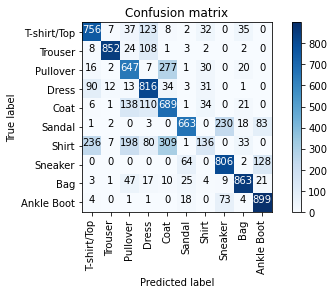

In [48]:
#calling the function to plot the Confusion Matrix of CatBoost

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
plot_confusion_matrix(cm1,classes)


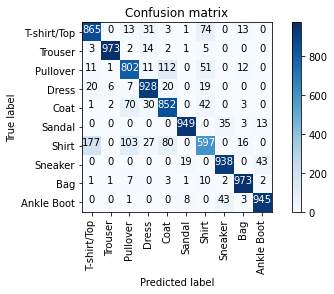

In [49]:
#Confusion Matrix for Random Forest

plot_confusion_matrix(cm2,classes)


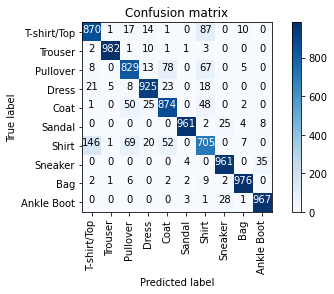

In [50]:
#Confusion Matrix for LightGBM

plot_confusion_matrix(cm3,classes)